In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
sns.set()

Load data

In [116]:
path = "ALLLEAGUESDATA.csv"
df = pd.read_csv(path,delimiter=";")
display(df.head())

,League,Season,Home Team,Away Team,Home Goals,Away Goals,Home FH,Away FH,Home Win,Draw,Away Win,"Over 2,5","Under 2,5",Code 1,Code 2,Total Goals,FH Goals,Winner,HT Winner
0,Eng1,20,Liverpool,Norwich,4,1,4,0,1?140,10?430,19?630,1?340,3?440,1002,1011,5,4,H,H
1,Eng1,20,Tottenham,Aston Villa,3,1,0,1,1?390,5?350,8?420,1?580,2?520,1001,1003,4,1,H,A
2,Eng1,20,C Palace,Everton,0,0,0,0,3?370,3?450,2?270,2?220,1?740,1012,1017,0,0,D,D
3,Eng1,20,West Ham,Man City,0,5,0,1,11?110,6?680,1?270,1?430,3?030,1022,1009,5,1,A,A
4,Eng1,20,Watford,Brighton,0,3,0,1,2?050,3?380,4?120,2?160,1?780,1025,1036,3,1,A,A


In [117]:
df_code = df[['Home Team', 'Code 1']]
df_code

,Home Team,Code 1
0,Liverpool,1002
1,Tottenham,1001
2,C Palace,1012
3,West Ham,1022
4,Watford,1025
...,...,...
63184,Toluca,41007
63185,Monterrey,41018
63186,San Luis,41019
63187,Santos Laguna,41008


Data cleaning

Clean column with '?'

In [118]:
df[['Home Win','Away Win','Draw', 'Over 2,5','Under 2,5']] = df[['Home Win','Away Win','Draw', 'Over 2,5','Under 2,5']].applymap(lambda x: x.replace('?', ''))
df.head()

,League,Season,Home Team,Away Team,Home Goals,Away Goals,Home FH,Away FH,Home Win,Draw,Away Win,"Over 2,5","Under 2,5",Code 1,Code 2,Total Goals,FH Goals,Winner,HT Winner
0,Eng1,20,Liverpool,Norwich,4,1,4,0,1140,10430,19630,1340,3440,1002,1011,5,4,H,H
1,Eng1,20,Tottenham,Aston Villa,3,1,0,1,1390,5350,8420,1580,2520,1001,1003,4,1,H,A
2,Eng1,20,C Palace,Everton,0,0,0,0,3370,3450,2270,2220,1740,1012,1017,0,0,D,D
3,Eng1,20,West Ham,Man City,0,5,0,1,11110,6680,1270,1430,3030,1022,1009,5,1,A,A
4,Eng1,20,Watford,Brighton,0,3,0,1,2050,3380,4120,2160,1780,1025,1036,3,1,A,A


Keep only the 5 main leagues

### Calcul de feature

Proportion de Match gagné par les team en Home

Feature:
- % win when the team is Home
- % win when the team is Away
- avg goal scored when the team is Home
- avg goal scored when the team is Away
- avg goal conceded when the team is Home
- avg goal conceded when the team is Away


#### % win when the team is Home

In [119]:
# Compter le nombre de victoires à domicile pour chaque équipe
home_wins = df[df['Winner'] == 'H']['Home Team'].value_counts()

# Compter le nombre total de matchs à domicile pour chaque équipe
home_matches = df['Home Team'].value_counts()

# Calculer le pourcentage de victoires à domicile pour chaque équipe
home_win_percentage = (home_wins / home_matches) * 100

home_win_percentage = home_win_percentage.rename('Home Win %')
home_win_percentage

Home Team
1. FSV Mainz 05    36.764706
1860 Munich        48.684211
ABC                16.666667
AEK Athens         65.384615
AIK                54.901961
                     ...    
Zulte              32.307692
Zurich             41.666667
Zweigen K          30.136986
Zwickau            35.135135
Zwolle             44.615385
Name: Home Win %, Length: 1379, dtype: float64

#### % win when the team is Away

In [120]:
# % win when the team is Away

# Compter le nombre de victoires à domicile pour chaque équipe
away_wins = df[df['Winner'] == 'A']['Away Team'].value_counts()

# Compter le nombre total de matchs à domicile pour chaque équipe
away_matches = df['Away Team'].value_counts()

# Calculer le pourcentage de victoires à domicile pour chaque équipe
away_win_percentage = (away_wins / away_matches) * 100

away_win_percentage

# change the name of the column
away_win_percentage = away_win_percentage.rename('Away Win %')
away_win_percentage

Away Team
1. FSV Mainz 05    30.882353
1860 Munich        39.473684
ABC                      NaN
AEK Athens         53.846154
AIK                29.411765
                     ...    
Zurich             36.111111
Zweigen K          27.027027
Zwickau            23.684211
Zwolle             31.343284
ziantep                  NaN
Name: Away Win %, Length: 1381, dtype: float64

#### avg goal scored by home team

In [121]:
# Calculer le nombre moyen de buts à domicile pour chaque équipe
home_goals_mean = df.groupby('Home Team')['Home Goals'].mean()
home_goals_mean = home_goals_mean.rename('Avg_Goal_Home')
home_goals_mean

Home Team
1. FSV Mainz 05    1.441176
1860 Munich        1.921053
ABC                0.666667
AEK Athens         1.961538
AIK                1.392157
                     ...   
Zulte              1.584615
Zurich             1.680556
Zweigen K          1.260274
Zwickau            1.459459
Zwolle             1.815385
Name: Avg_Goal_Home, Length: 1379, dtype: float64

#### avg goal scored by Away team

In [122]:
away_goals_mean = df.groupby('Away Team')['Away Goals'].mean()
away_goals_mean = away_goals_mean.rename('Avg_Goal_Away')
away_goals_mean

Away Team
1. FSV Mainz 05    1.308824
1860 Munich        1.526316
ABC                0.333333
AEK Athens         1.423077
AIK                1.137255
                     ...   
Zurich             1.333333
Zweigen K          1.162162
Zwickau            1.105263
Zwolle             1.313433
ziantep            0.000000
Name: Avg_Goal_Away, Length: 1381, dtype: float64

#### avg goal concede by home team

In [123]:
# Calculer le nombre moyen de buts concéder à domicile
home_goals_concede_mean = df.groupby('Home Team')['Away Goals'].mean()
home_goals_concede_mean = home_goals_concede_mean.rename('Avg_Goal_Concede_Home')
home_goals_concede_mean

Home Team
1. FSV Mainz 05    1.338235
1860 Munich        1.197368
ABC                1.500000
AEK Athens         0.846154
AIK                0.823529
                     ...   
Zulte              2.046154
Zurich             1.541667
Zweigen K          1.479452
Zwickau            1.337838
Zwolle             1.323077
Name: Avg_Goal_Concede_Home, Length: 1379, dtype: float64

#### avg goal concede by Away team

In [124]:
away_goals_concede_mean = df.groupby('Away Team')['Home Goals'].mean()
away_goals_concede_mean = away_goals_concede_mean.rename('Avg_Goal_Concede_Away')
away_goals_concede_mean

Away Team
1. FSV Mainz 05    1.911765
1860 Munich        1.355263
ABC                1.666667
AEK Athens         0.942308
AIK                1.352941
                     ...   
Zurich             1.652778
Zweigen K          1.648649
Zwickau            1.618421
Zwolle             1.746269
ziantep            2.000000
Name: Avg_Goal_Concede_Away, Length: 1381, dtype: float64

In [125]:
# join the two series
df_silver = pd.concat([home_win_percentage, away_win_percentage, home_goals_mean, home_goals_concede_mean, away_goals_mean, away_goals_concede_mean], axis=1)
df_silver = df_silver.reset_index().rename(columns={'index': 'Team'})
print(df_silver.head())

              Team  Home Win %  Away Win %  Avg_Goal_Home  \
0  1. FSV Mainz 05   36.764706   30.882353       1.441176   
1      1860 Munich   48.684211   39.473684       1.921053   
2              ABC   16.666667         NaN       0.666667   
3       AEK Athens   65.384615   53.846154       1.961538   
4              AIK   54.901961   29.411765       1.392157   

   Avg_Goal_Concede_Home  Avg_Goal_Away  Avg_Goal_Concede_Away  
0               1.338235       1.308824               1.911765  
1               1.197368       1.526316               1.355263  
2               1.500000       0.333333               1.666667  
3               0.846154       1.423077               0.942308  
4               0.823529       1.137255               1.352941  


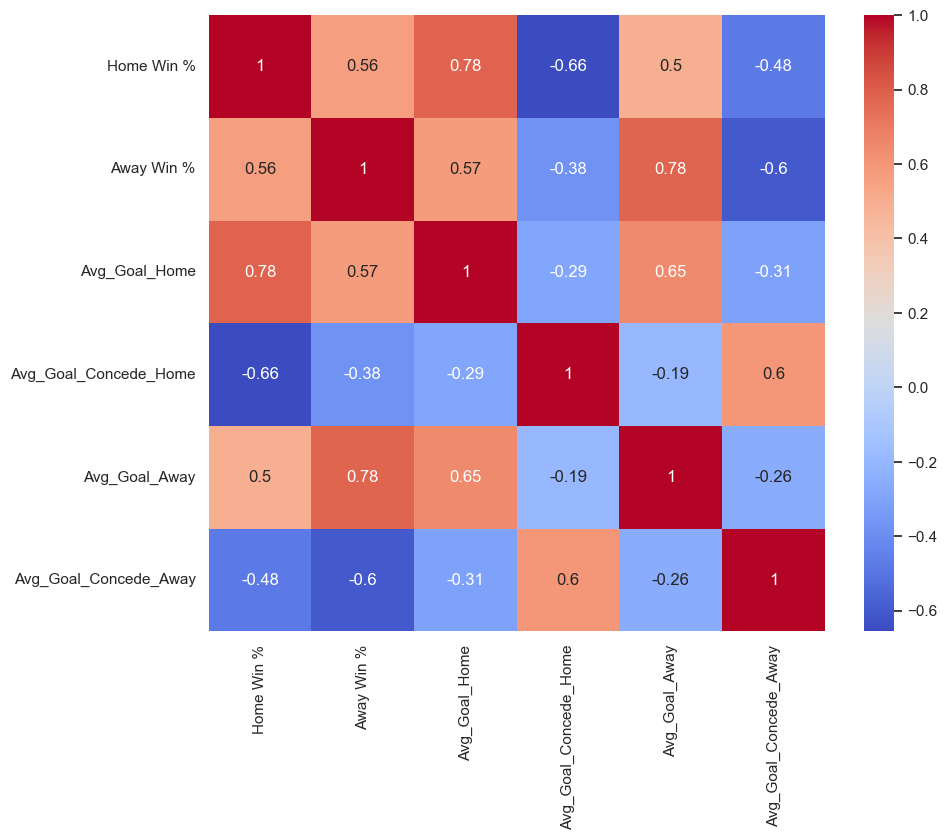

In [126]:
correlation = df_silver.drop('Team', axis=1).corr()
# Tracer la matrice de corrélation avec seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', square=True)
# Afficher le plot
plt.show()

In [127]:
df_silver

,Team,Home Win %,Away Win %,Avg_Goal_Home,Avg_Goal_Concede_Home,Avg_Goal_Away,Avg_Goal_Concede_Away
0,1. FSV Mainz 05,36.764706,30.882353,1.441176,1.338235,1.308824,1.911765
1,1860 Munich,48.684211,39.473684,1.921053,1.197368,1.526316,1.355263
2,ABC,16.666667,NaN,0.666667,1.500000,0.333333,1.666667
3,AEK Athens,65.384615,53.846154,1.961538,0.846154,1.423077,0.942308
4,AIK,54.901961,29.411765,1.392157,0.823529,1.137255,1.352941
...,...,...,...,...,...,...,...
1376,Zweigen K,30.136986,27.027027,1.260274,1.479452,1.162162,1.648649
1377,Zwickau,35.135135,23.684211,1.459459,1.337838,1.105263,1.618421
1378,Zwolle,44.615385,31.343284,1.815385,1.323077,1.313433,1.746269
1379,Nagoia,NaN,NaN,NaN,NaN,0.000000,2.000000


In [128]:
df_code = df_code.rename(columns={'Home Team': 'Team'})
df_code  =df_code.drop_duplicates()

In [129]:
# join df_code and df_silver on column Team
df_final = pd.merge(df_code, df_silver, on='Team', how='inner')
df_final

,Team,Code 1,Home Win %,Away Win %,Avg_Goal_Home,Avg_Goal_Concede_Home,Avg_Goal_Away,Avg_Goal_Concede_Away
0,Liverpool,1002,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579
1,Tottenham,1001,61.842105,35.526316,1.921053,1.065789,1.605263,1.500000
2,C Palace,1012,34.210526,25.000000,1.092105,1.210526,1.039474,1.565789
3,West Ham,1022,43.421053,30.263158,1.592105,1.381579,1.210526,1.447368
4,Watford,1025,45.238095,22.619048,1.404762,1.285714,0.845238,1.380952
...,...,...,...,...,...,...,...,...
1382,Tijuana de Caliente,41006,30.769231,12.000000,1.038462,1.269231,0.760000,2.040000
1383,Pumas UNAM,41014,40.740741,16.666667,1.518519,1.222222,1.083333,1.583333
1384,Mazatlan,41021,36.000000,11.538462,1.320000,1.480000,1.000000,1.615385
1385,Toluca,41007,48.000000,26.923077,1.760000,1.240000,1.076923,1.615385


## Creation du dataset

In [130]:
df_filtered = df[['Code 1', 'Code 2', 'Winner']]
df_filtered

,Code 1,Code 2,Winner
0,1002,1011,H
1,1001,1003,H
2,1012,1017,D
3,1022,1009,A
4,1025,1036,A
...,...,...,...
63184,41007,41011,H
63185,41018,41004,D
63186,41019,41005,A
63187,41008,41021,H


In [131]:
merged_df = pd.merge(df_final, df_filtered, left_on='Code 1', right_on='Code 1', how='left')

merged_df_1 = merged_df.rename(columns={'Code 2_x': 'Code 2',  'Home Win %':'Home_Win_T1', 'Away Win %':'Away_Win_T1', 'Avg_Goal_Home':'Avg_Goal_Home_T1',
       'Avg_Goal_Concede_Home':'Avg_Goal_Concede_Home_T1', 'Avg_Goal_Away':'Avg_Goal_Away_T1', 'Avg_Goal_Concede_Away':'Avg_Goal_Concede_Away_T1'})
merged_df_1 = merged_df_1.drop('Team', axis=1)

merged_df_2 = pd.merge(merged_df_1, df_final, left_on='Code 2', right_on='Code 1', how='left')
merged_df_2 = merged_df_2.drop('Team', axis=1)
merged_df_1 = merged_df.rename(columns={'Code 1_x': 'Code_T1',  'Home Win %':'Home_Win_T2', 'Away Win %':'Away_Win_T2', 'Avg_Goal_Home':'Avg_Goal_Home_T2',
       'Avg_Goal_Concede_Home':'Avg_Goal_Concede_Home_T2', 'Avg_Goal_Away':'Avg_Goal_Away_T2', 'Avg_Goal_Concede_Away':'Avg_Goal_Concede_Away_T2', 'Code 1_y': 'Code_T2'})
merged_df_2

,Code 1_x,Home_Win_T1,Away_Win_T1,Avg_Goal_Home_T1,Avg_Goal_Concede_Home_T1,Avg_Goal_Away_T1,Avg_Goal_Concede_Away_T1,Code 2,Winner,Code 1_y,Home Win %,Away Win %,Avg_Goal_Home,Avg_Goal_Concede_Home,Avg_Goal_Away,Avg_Goal_Concede_Away
0,1002,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,1011,H,1011,34.523810,32.142857,1.154762,1.452381,1.000000,1.511905
1,1002,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,1018,H,1018,53.608247,37.623762,1.773196,1.134021,1.277228,1.217822
2,1002,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,1016,H,1016,38.888889,27.559055,1.468254,1.357143,1.086614,1.629921
3,1002,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,1042,H,1042,46.052632,34.210526,1.657895,1.276316,1.605263,1.592105
4,1002,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,1001,H,1001,61.842105,35.526316,1.921053,1.065789,1.605263,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66291,41013,36.000000,28.000000,0.960000,1.000000,1.000000,0.840000,41018,H,41018,54.545455,37.142857,1.545455,0.848485,1.400000,1.200000
66292,41013,36.000000,28.000000,0.960000,1.000000,1.000000,0.840000,41014,H,41014,55.555556,11.111111,1.777778,0.777778,0.555556,1.444444
66293,41013,36.000000,28.000000,0.960000,1.000000,1.000000,0.840000,41014,H,41014,40.740741,16.666667,1.518519,1.222222,1.083333,1.583333
66294,41013,36.000000,28.000000,0.960000,1.000000,1.000000,0.840000,41017,H,41017,31.428571,26.470588,1.285714,1.371429,1.117647,1.382353


Réarrangement des colonnes

In [132]:
train_df = merged_df_2[['Home_Win_T1', 'Away_Win_T1', 'Avg_Goal_Home_T1',
       'Avg_Goal_Concede_Home_T1', 'Avg_Goal_Away_T1',
       'Avg_Goal_Concede_Away_T1','Home Win %', 'Away Win %', 'Avg_Goal_Home', 'Avg_Goal_Concede_Home',
       'Avg_Goal_Away', 'Avg_Goal_Concede_Away', 'Winner']]
print('Taille du dataset:', train_df.shape[0])
print("Proportion des classes :")
# Plot it
train_df['Winner'].value_counts(normalize=True)


Taille du dataset: 66296
Proportion des classes :


Winner
H    0.428563
A    0.309898
D    0.261539
Name: proportion, dtype: float64

In [143]:
from sklearn.utils.multiclass import type_of_target

type_of_target(train_df['Winner'])

'unknown'

Encodage des variables catégorielles

In [144]:
for label in ["Winner"]:
    # train_df[label] = train_df[label].astype(int)
    train_df.loc[train_df[label] == 'nan', label] = "unknown"
    train_df.loc[:, label] = LabelEncoder().fit_transform(train_df.loc[:, label].copy())

train_df.head()

,Home_Win_T1,Away_Win_T1,Avg_Goal_Home_T1,Avg_Goal_Concede_Home_T1,Avg_Goal_Away_T1,Avg_Goal_Concede_Away_T1,Home Win %,Away Win %,Avg_Goal_Home,Avg_Goal_Concede_Home,Avg_Goal_Away,Avg_Goal_Concede_Away,Winner
0,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,34.523810,32.142857,1.154762,1.452381,1.000000,1.511905,2
1,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,53.608247,37.623762,1.773196,1.134021,1.277228,1.217822,2
2,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,38.888889,27.559055,1.468254,1.357143,1.086614,1.629921,2
3,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,46.052632,34.210526,1.657895,1.276316,1.605263,1.592105,2
4,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,61.842105,35.526316,1.921053,1.065789,1.605263,1.500000,2


In [145]:
train_df = train_df.dropna()
train_df.head()

,Home_Win_T1,Away_Win_T1,Avg_Goal_Home_T1,Avg_Goal_Concede_Home_T1,Avg_Goal_Away_T1,Avg_Goal_Concede_Away_T1,Home Win %,Away Win %,Avg_Goal_Home,Avg_Goal_Concede_Home,Avg_Goal_Away,Avg_Goal_Concede_Away,Winner
0,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,34.523810,32.142857,1.154762,1.452381,1.000000,1.511905,2
1,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,53.608247,37.623762,1.773196,1.134021,1.277228,1.217822,2
2,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,38.888889,27.559055,1.468254,1.357143,1.086614,1.629921,2
3,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,46.052632,34.210526,1.657895,1.276316,1.605263,1.592105,2
4,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,61.842105,35.526316,1.921053,1.065789,1.605263,1.500000,2


In [146]:
train_df.isna().sum()
train_df.head()

,Home_Win_T1,Away_Win_T1,Avg_Goal_Home_T1,Avg_Goal_Concede_Home_T1,Avg_Goal_Away_T1,Avg_Goal_Concede_Away_T1,Home Win %,Away Win %,Avg_Goal_Home,Avg_Goal_Concede_Home,Avg_Goal_Away,Avg_Goal_Concede_Away,Winner
0,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,34.523810,32.142857,1.154762,1.452381,1.000000,1.511905,2
1,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,53.608247,37.623762,1.773196,1.134021,1.277228,1.217822,2
2,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,38.888889,27.559055,1.468254,1.357143,1.086614,1.629921,2
3,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,46.052632,34.210526,1.657895,1.276316,1.605263,1.592105,2
4,73.684211,56.578947,2.315789,0.815789,1.921053,1.131579,61.842105,35.526316,1.921053,1.065789,1.605263,1.500000,2


In [147]:
train_df = train_df.drop_duplicates()

In [148]:
train_df.shape

(47092, 13)

In [149]:
train_df.describe()

,Home_Win_T1,Away_Win_T1,Avg_Goal_Home_T1,Avg_Goal_Concede_Home_T1,Avg_Goal_Away_T1,Avg_Goal_Concede_Away_T1,Home Win %,Away Win %,Avg_Goal_Home,Avg_Goal_Concede_Home,Avg_Goal_Away,Avg_Goal_Concede_Away
count,47092.000000,47092.000000,47092.000000,47092.000000,47092.000000,47092.000000,47092.000000,47092.000000,47092.000000,47092.000000,47092.000000,47092.000000
mean,42.070603,30.313123,1.439866,1.207579,1.182214,1.475652,42.497520,30.605678,1.451262,1.201315,1.189491,1.467886
std,12.582077,11.268195,0.365440,0.293252,0.307865,0.321723,12.896506,11.411775,0.374913,0.295347,0.312754,0.321662
min,6.666667,2.941176,0.333333,0.000000,0.250000,0.466667,6.666667,2.941176,0.333333,0.000000,0.250000,0.466667
25%,33.870968,22.857143,1.215686,1.015625,0.977273,1.258065,34.210526,23.076923,1.218750,1.011905,0.984375,1.250000
50%,40.909091,29.310345,1.386364,1.185714,1.133333,1.456522,41.304348,29.411765,1.396232,1.183099,1.140845,1.447368
75%,48.611111,35.869565,1.623529,1.382353,1.344828,1.666667,49.295775,36.111111,1.633333,1.381579,1.352941,1.657895
max,100.000000,87.755102,3.205882,3.181818,3.068182,3.100000,100.000000,87.755102,3.205882,3.181818,3.068182,3.100000


Prepartion for training

In [150]:
from sklearn.model_selection import train_test_split

# train_df = train_df['Winner'].astype(int)
X = train_df.drop("Winner", axis=1)
y = train_df['Winner']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=40
)

y_train = y_train.astype(int)
y_test = y_test.astype(int)
X_train.head()

,Home_Win_T1,Away_Win_T1,Avg_Goal_Home_T1,Avg_Goal_Concede_Home_T1,Avg_Goal_Away_T1,Avg_Goal_Concede_Away_T1,Home Win %,Away Win %,Avg_Goal_Home,Avg_Goal_Concede_Home,Avg_Goal_Away,Avg_Goal_Concede_Away
20642,44.117647,26.470588,1.617647,1.205882,1.352941,1.823529,41.176471,22.058824,1.676471,1.397059,1.323529,1.720588
43132,28.571429,23.809524,1.269841,1.396825,1.015873,1.492063,50.793651,33.333333,1.523810,0.968254,1.063492,1.349206
31702,44.897959,42.000000,1.571429,1.326531,1.580000,1.380000,29.629630,25.000000,1.444444,1.740741,1.071429,1.500000
28017,48.148148,16.666667,1.333333,1.018519,0.944444,1.648148,59.259259,37.037037,1.611111,0.777778,1.222222,1.166667
7424,36.363636,20.930233,1.125000,1.147727,0.918605,1.279070,26.136364,13.793103,1.068182,1.500000,0.793103,1.896552


In [153]:
from sklearn.utils.multiclass import type_of_target

type_of_target(y_test)

'multiclass'

In [152]:
import os
X.to_csv(os.path.expanduser("data/X.csv"), index=False)
y.to_csv(os.path.expanduser("data/y.csv"), index=False)

X_train.to_csv(os.path.expanduser("data/X_train.csv"), index=False)
X_test.to_csv(os.path.expanduser("data/X_test.csv"), index=False)
y_train.to_csv(os.path.expanduser("data/y_train.csv"), index=False)
y_test.to_csv(os.path.expanduser("data/y_test.csv"), index=False)

In [154]:
type_of_target(y_train)

'multiclass'

In [155]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import f1_score

K-fold cross validation

In [156]:
# On répète 3 fois un 5-Fold
rep_kfold = RepeatedKFold(n_splits=4, n_repeats=3) # 4-Fold => 25% de test

# Hyper-paramètres des modèles
hyp_params = {
    "num_leaves": 60,
    "min_child_samples": 10,
    "max_depth": 12,
    "n_estimators": 100,
    "learning_rate": 0.1
}

In [159]:
scores_train = []
scores_test = []
n_iter = 1
for train_I, test_I in rep_kfold.split(X):
    print("Itération {} du k-Fold".format(n_iter))
    # On récupère les indices des sous-échantillons
    X_fold_train = X.iloc[train_I, :]
    y_fold_train = y.iloc[train_I]
    X_fold_test = X.iloc[test_I, :]
    y_fold_test = y.iloc[test_I]


    # On entraîne un LightGBM avec les paramètres par défaut
    model = LGBMClassifier(**hyp_params, objective="multiclass", verbose=-1)
    model.fit(X_fold_train, y_fold_train)

    # On calcule le score du modèle sur le test
    scores_train.append(
        f1_score(y_fold_train, model.predict(X_fold_train), average='weighted')
    )
    scores_test.append(
        f1_score(y_fold_test, model.predict(X_fold_test), average='weighted')
    )
    n_iter += 1

Itération 1 du k-Fold


ValueError: Unknown label type: unknown. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.